<a href="https://colab.research.google.com/github/minnji88/DeepLearning2020/blob/master/2_MNIST_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 코드 2-1 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# 코드 2-2 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) # 0 ~ 9 숫자

In [3]:
# 코드 2-3 컴파일 단계
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# 코드 2-4 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
# 코드 2-5 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# 코드 : 훈련 실행과 결과
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.4271 - accuracy: 0.8763
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1127 - accuracy: 0.9659
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9864
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9794
test_acc: 0.9793999791145325


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

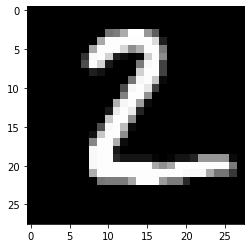

In [8]:
image = test_images[1]
image = np.reshape(image,[28,28])
plt.imshow(image, 'gray')
plt.show()